## Data Understanding and Data Preprocessing

In [1]:
# downloading required libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Import label encoder
from sklearn import preprocessing

### 1. Please take a look at the data types and summary of our variables

In [66]:
df_climate=pd.read_csv("ClimateData.csv")

In [67]:
df_climate

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [68]:
df_climate.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [69]:
df_climate.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02
75756,75756,Residential,23888.0,1974.0,107.69,28.8,49.127397,NaN,29.15


In [70]:
df_meta= pd.read_csv("Metadata.csv")

In [71]:
df_meta

,id,building id
0,building_class,building classification
1,floor_area,floor area (in square feet) of the building
2,year_built,year in which the building was constructed
3,precipitation_inches,annual precipitation in inches at the location...
4,snowfall_inches,annual snowfall in inches at the location of t...
5,avg_temp,average temperature over a year at the locatio...
6,days_with_fog,number of days with fog at the location of the...
7,eui,Site Energy Usage Intensity is the amount of h...


In [72]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


### 2. Summarize the number of unique values in each column.

In [73]:
col_name=[]
for column in df_climate:
    col_name.append(column)
#print (col_name)

for i in col_name:
    count = df_climate[i].unique().size
    unique_value= df_climate[i].unique()
    print(f'The unique values in {i} are: {unique_value}')
    print(f'The total unique values in {i} is: {count}')
    sorted_value= df_climate[i].value_counts()
    print(f'The each value and it number of repitions are: {sorted_value}')
    

#for i in 

The unique values in id are: [    0     1     2 ... 75754 75755 75756]
The total unique values in id is: 75757
The each value and it number of repitions are: 0        1
50493    1
50509    1
50508    1
50507    1
        ..
25252    1
25251    1
25250    1
25249    1
75756    1
Name: id, Length: 75757, dtype: int64
The unique values in building_class are: ['Commercial' 'Residential']
The total unique values in building_class is: 2
The each value and it number of repitions are: Residential    43558
Commercial     32199
Name: building_class, dtype: int64
The unique values in floor_area are: [ 61242. 274000. 280025. ... 103345.  36353.  40489.]
The total unique values in floor_area is: 20433
The each value and it number of repitions are: 60000.0     264
70000.0     213
80000.0     176
75000.0     173
72000.0     173
           ... 
450500.0      1
354100.0      1
123290.0      1
133280.0      1
40489.0       1
Name: floor_area, Length: 20433, dtype: int64
The unique values in year_built a

### 3. Check at descriptive statistics for the Dataset.

In [74]:
df_climate.describe() #numerical dataset

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


In [75]:
df_climate["building_class"].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

### 4. Check the number of missing values.

In [76]:
for j in col_name:
    empty_count= df_climate[j].isnull().sum()
    print(f'The number of missing values in {j} are total {empty_count}')

The number of missing values in id are total 0
The number of missing values in building_class are total 0
The number of missing values in floor_area are total 0
The number of missing values in year_built are total 1837
The number of missing values in precipitation_inches are total 0
The number of missing values in snowfall_inches are total 0
The number of missing values in avg_temp are total 0
The number of missing values in days_with_fog are total 45796
The number of missing values in site_eui are total 0


### 5. Take care of missing data. You can decide to remove or use the imputation.

From the above interpretation we can see the missing values are in the column year_built and days_with_fog. Looking at the graphs below we know the year_built has a very skewed distribution. Since the year cannot be replaced by the mean as year is in whole number, replacing it with mode. And, replacing days_with_fog missing values with mean of the variable, Not deleting the entire columns because the year_house was built affects the energy consumption as well and has missing values less than 1% of the total values, replacing.

/home/lasta/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_built'>

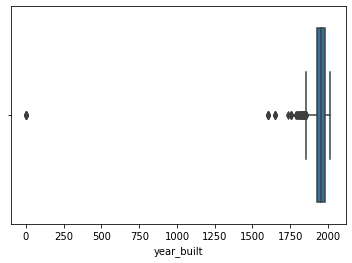

In [77]:
sns.boxplot(df_climate.year_built)


/home/lasta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_built', ylabel='Density'>

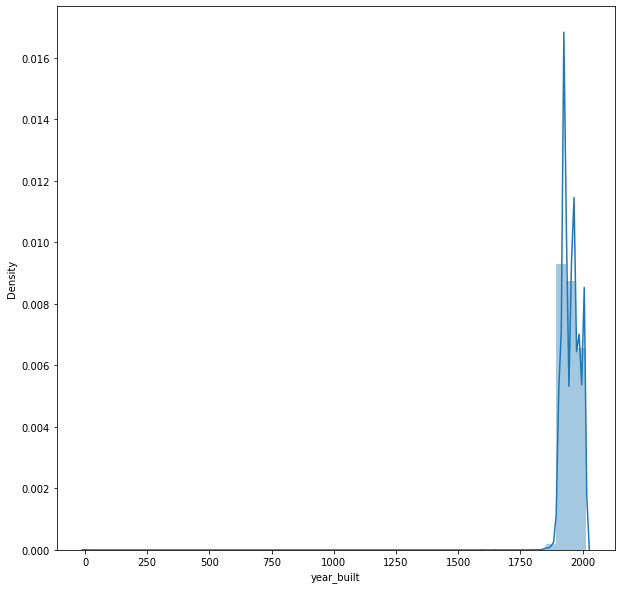

In [78]:
fig,ax= plt.subplots(figsize=(10,10))
sns.distplot(df_climate.year_built)

/home/lasta/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_with_fog'>

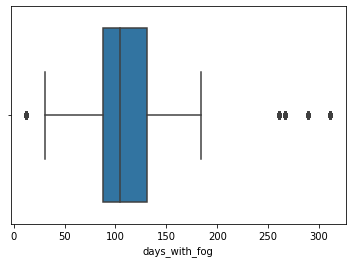

In [79]:
sns.boxplot(df_climate.days_with_fog)

/home/lasta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_with_fog', ylabel='Density'>

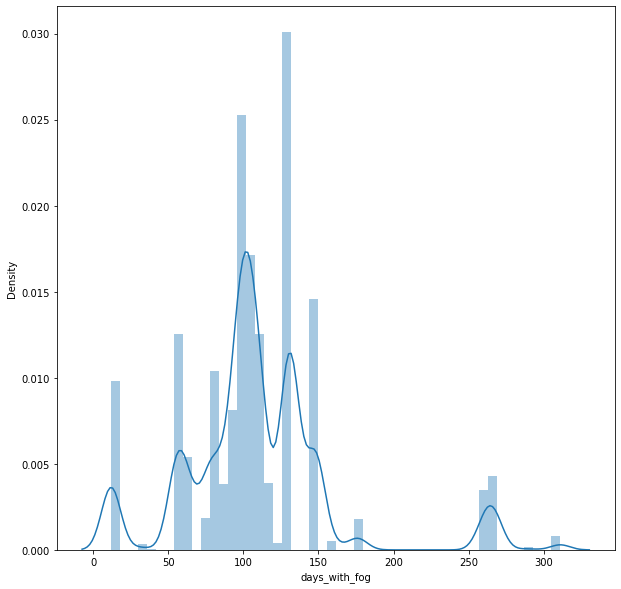

In [80]:
fig,ax= plt.subplots(figsize=(10,10))
sns.distplot(df_climate.days_with_fog)

In [81]:
df_climate['year_built']= df_climate['year_built'].fillna(df['year_built'].mode()[0])

In [82]:
df_climate['days_with_fog']= df_climate['days_with_fog'].fillna(df['days_with_fog'].mean())

In [83]:
df_climate


,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,109.142051,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,109.142051,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,109.142051,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,109.142051,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,109.142051,592.02


### 6. Find and remove duplicate variables.

In [84]:
display(df_climate.drop_duplicates(keep=False, inplace=True))

None

In [85]:
df_climate

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,109.142051,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,109.142051,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,109.142051,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,109.142051,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,109.142051,592.02


### 7. Encode the categorical variables; you can use label encoding, one hot encoding, or..

In [86]:
#categorical data variables
df_climate["building_class"].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [88]:
label_encoder = preprocessing.LabelEncoder()
df_climate['building_class']= label_encoder.fit_transform(df_climate['building_class'])
df_climate['building_class'].unique()

array([0, 1])

In [89]:
df_climate

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,0,61242.0,1942.0,16.59,0.0,56.972603,109.142051,248.68
1,1,0,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,2,0,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,3,0,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,4,0,66000.0,1985.0,16.59,0.0,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,0,20410.0,1995.0,45.03,1.4,55.147541,109.142051,132.92
75753,75753,1,40489.0,1910.0,45.03,1.4,55.147541,109.142051,39.48
75754,75754,0,28072.0,1917.0,106.32,36.6,47.911202,109.142051,48.40
75755,75755,0,53575.0,2012.0,106.32,36.6,47.911202,109.142051,592.02


### 8. Create the boxplot and show the outlier.

In [92]:
def boxplot_plt(df):
     for k in df.columns:
        if k!="building_class":
            plt.figure(figsize=(12,10))
            plt.boxplot(df[k], showfliers= True, showmeans= True)
            plt.xlabel(k)
            plt.title(f'Histogram of {k}')
            plt.show()

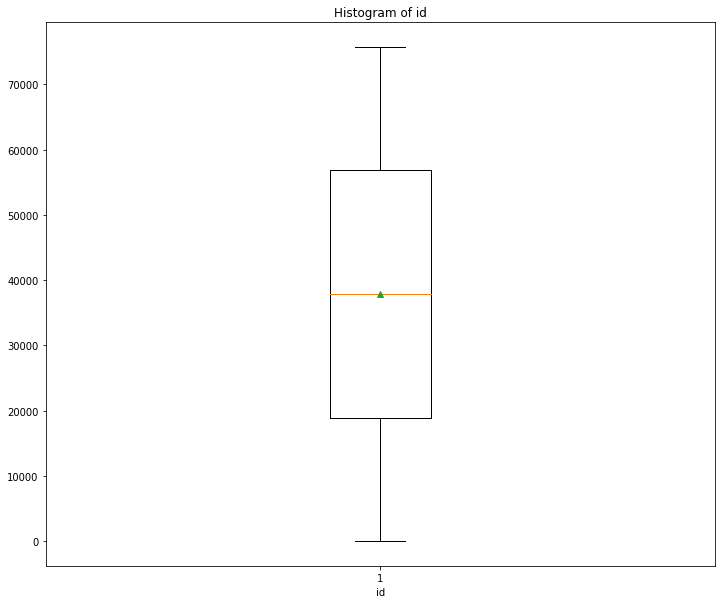

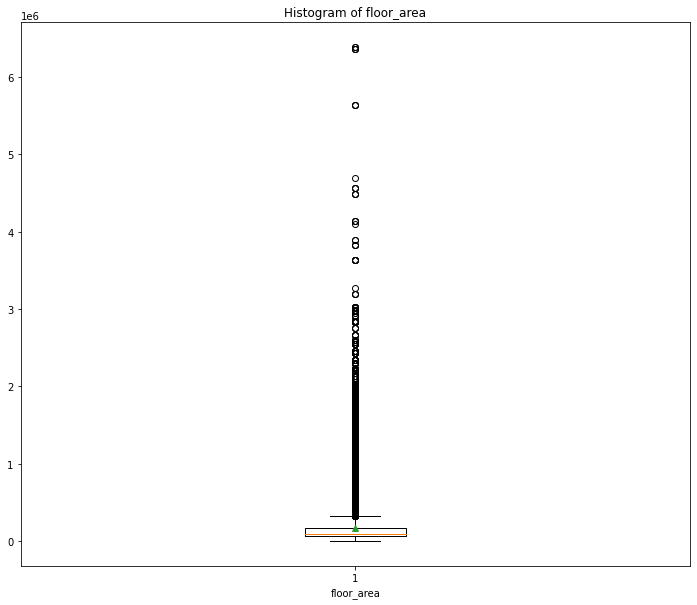

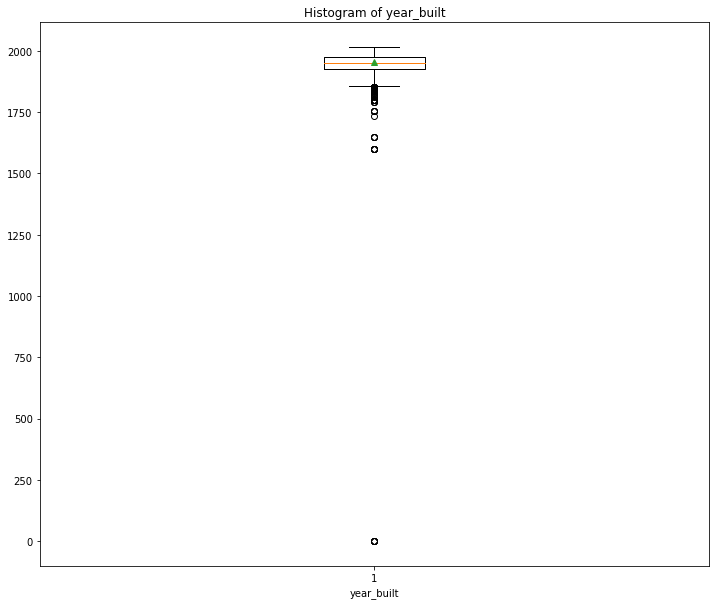

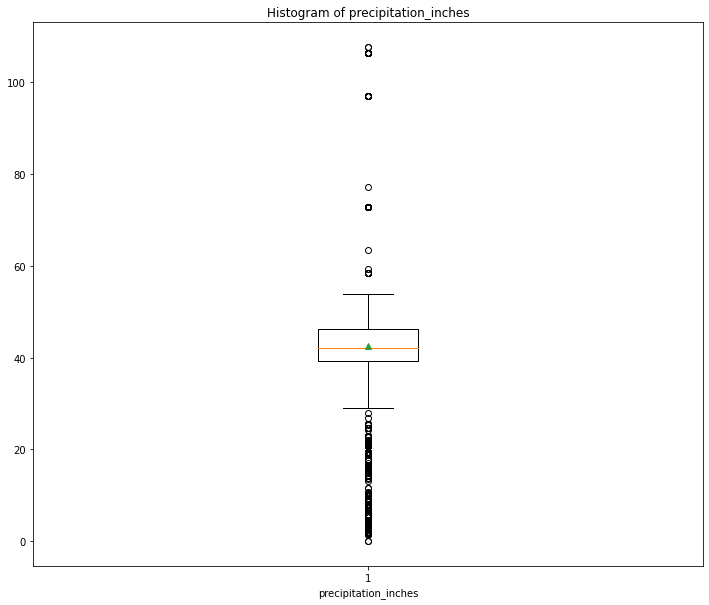

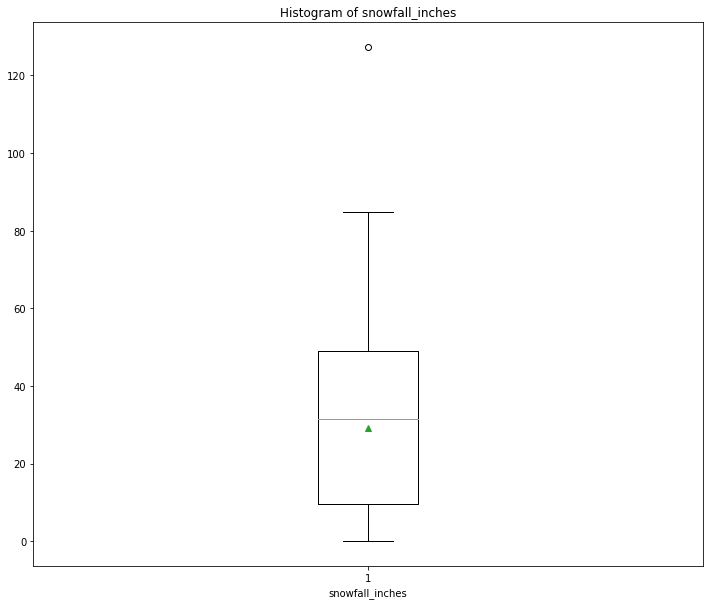

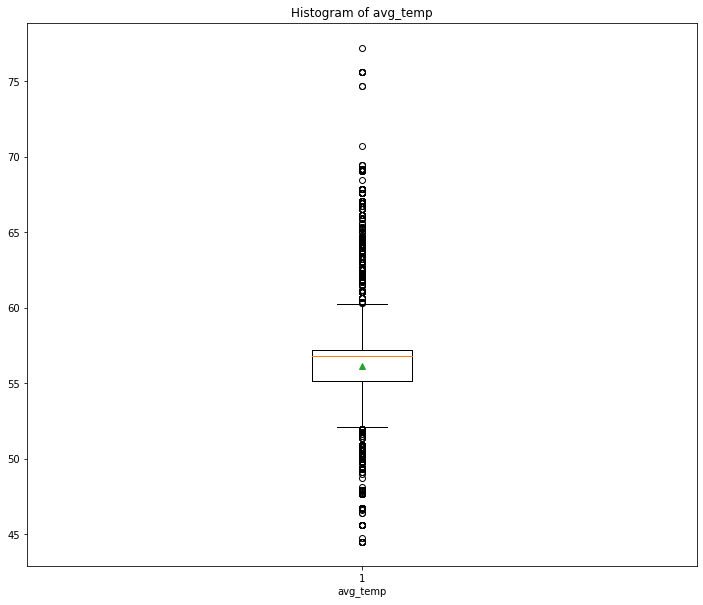

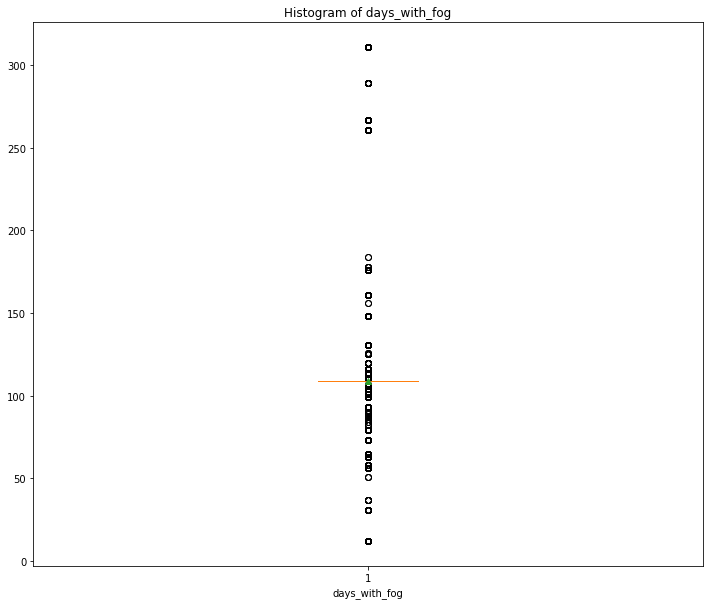

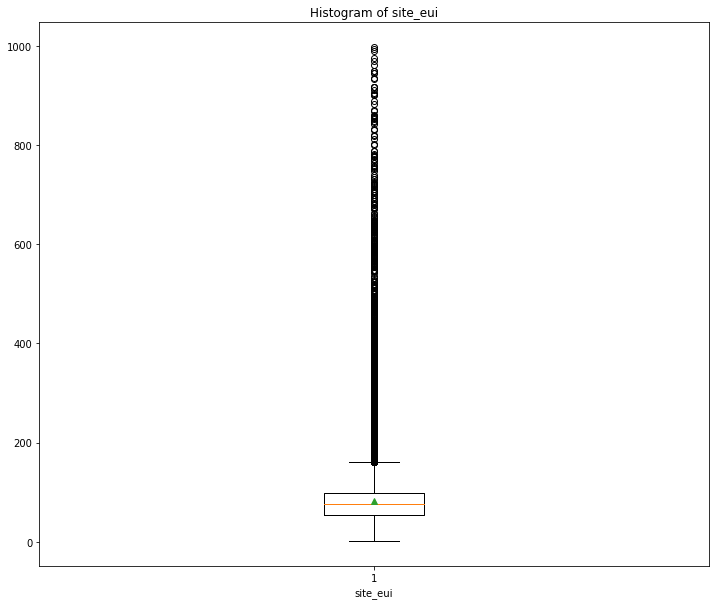

In [93]:
boxplot_plt(df_climate)

### 9. Create the histogram and check the outliers.

In [94]:
def histogram_plt(df):
    for column in df.columns:
        plt.figure(figsize=(12,10))
        plt.hist(df[column], bins=25, alpha= 0.5)
        plt.xlabel(column)
        plt.ylabel(f'Frequency of {column}')
        plt.title(f'Histogram of {column}')
        plt.show()

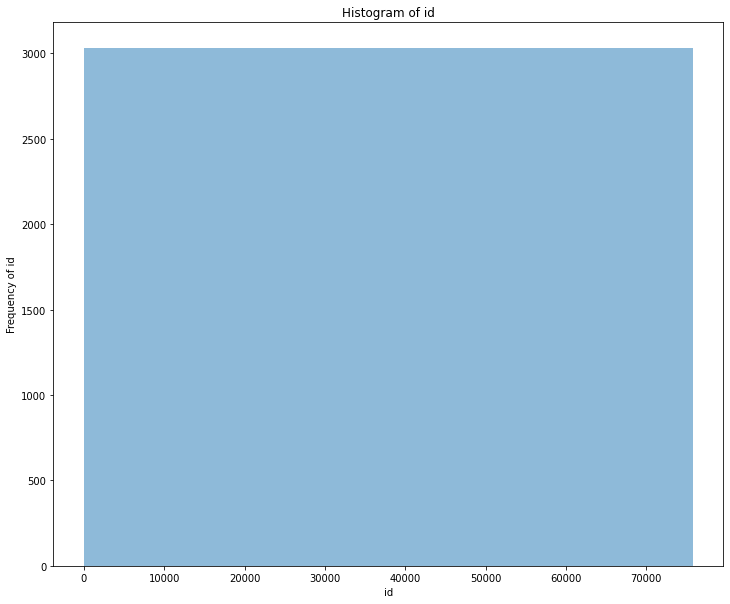

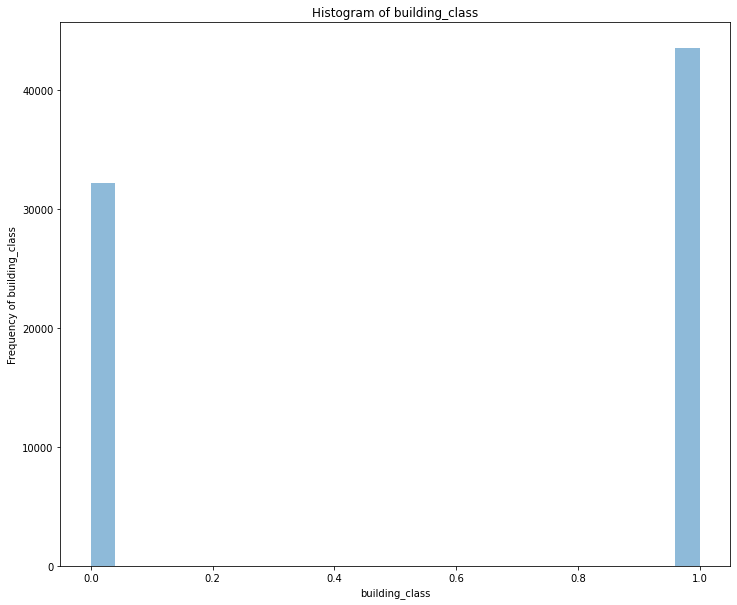

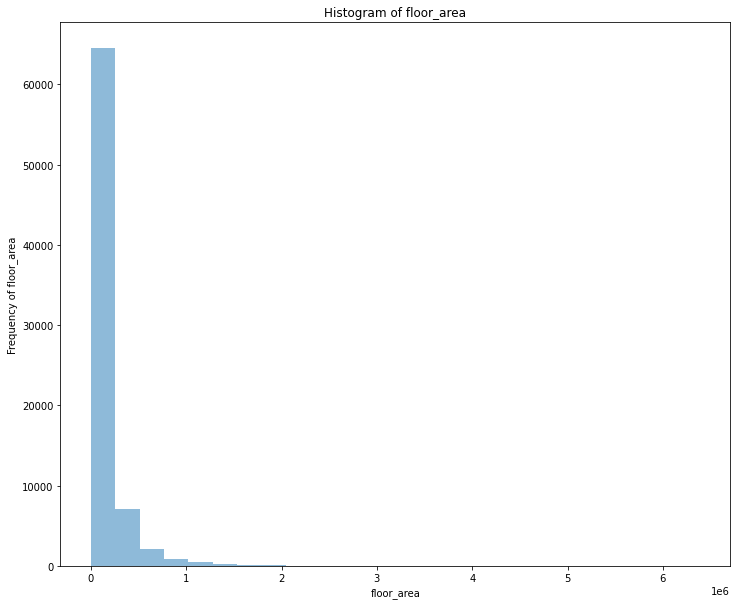

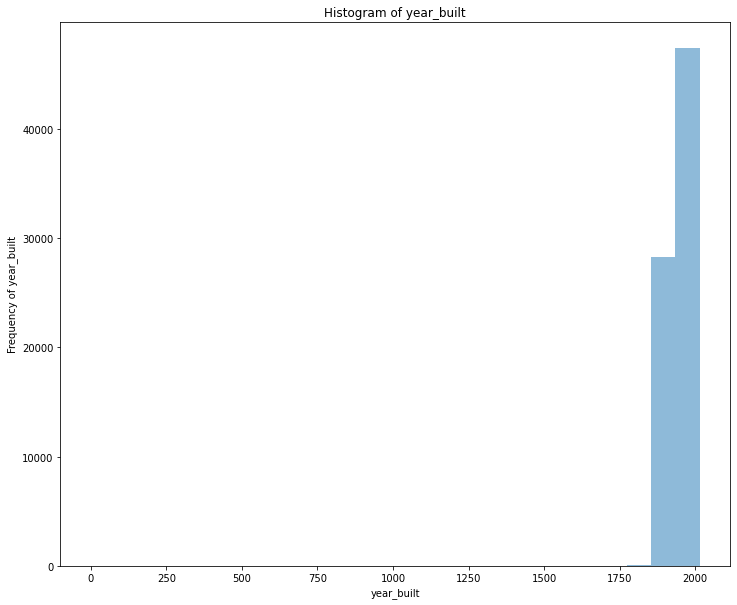

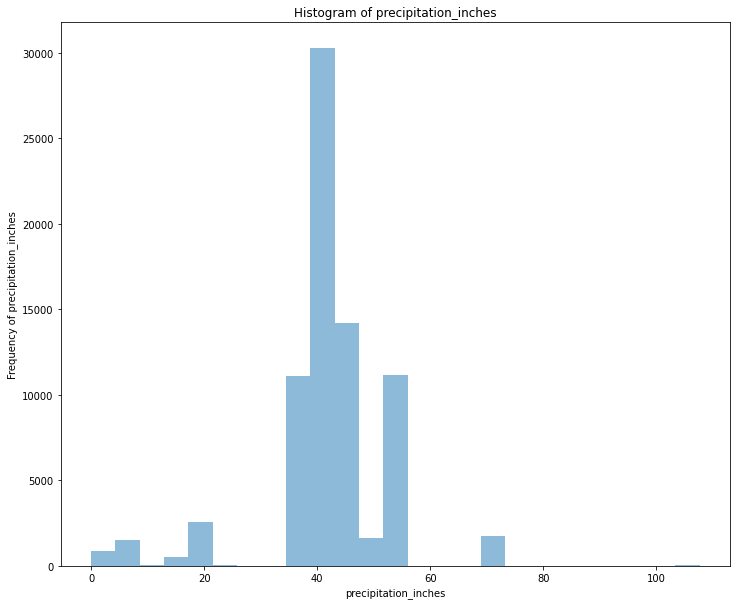

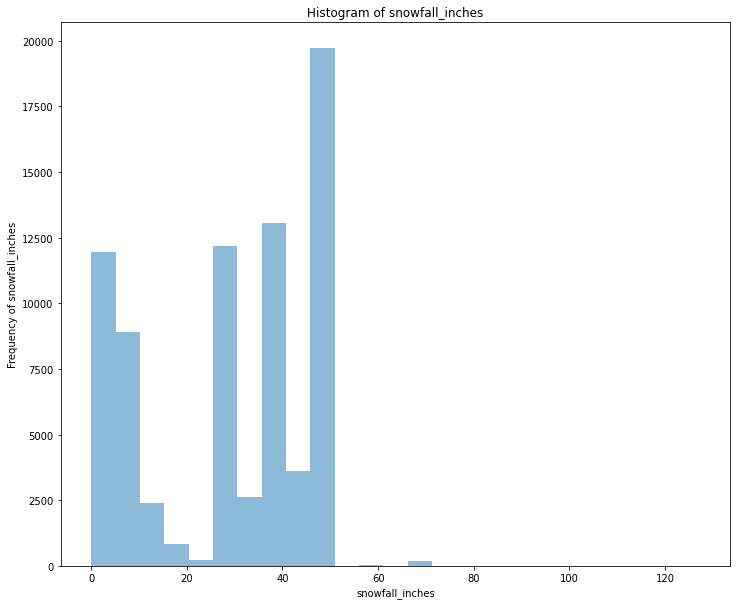

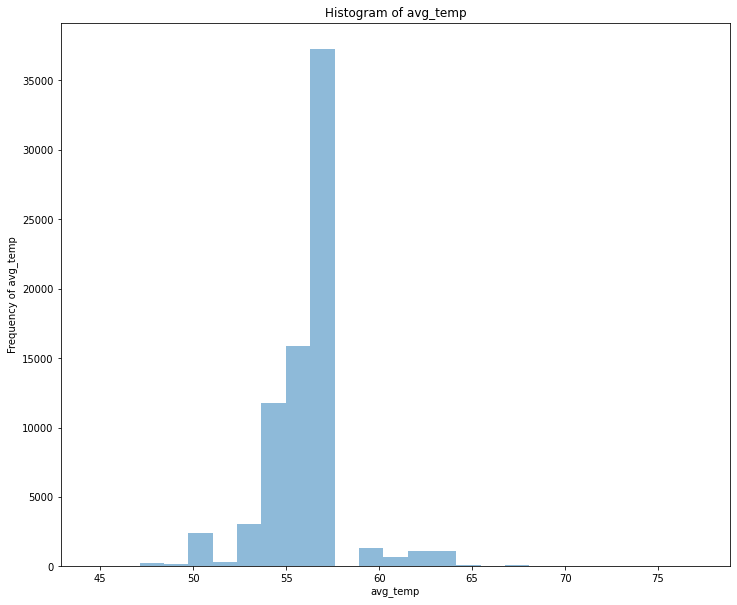

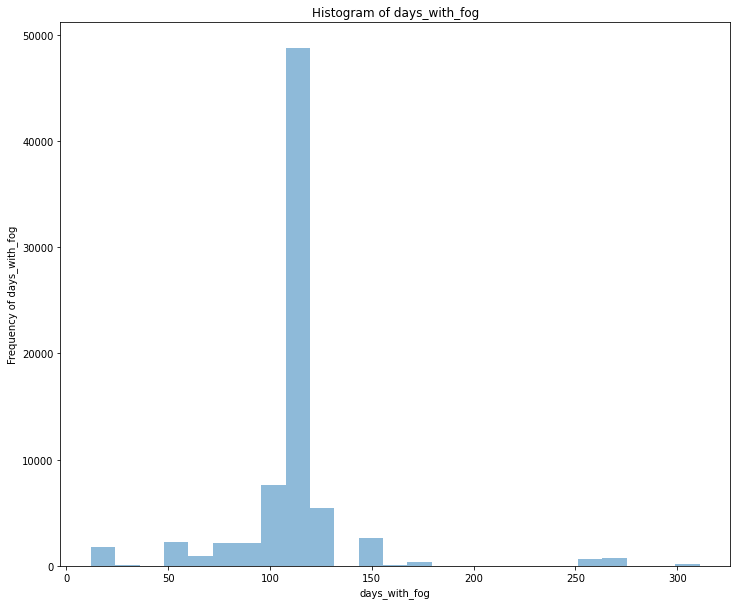

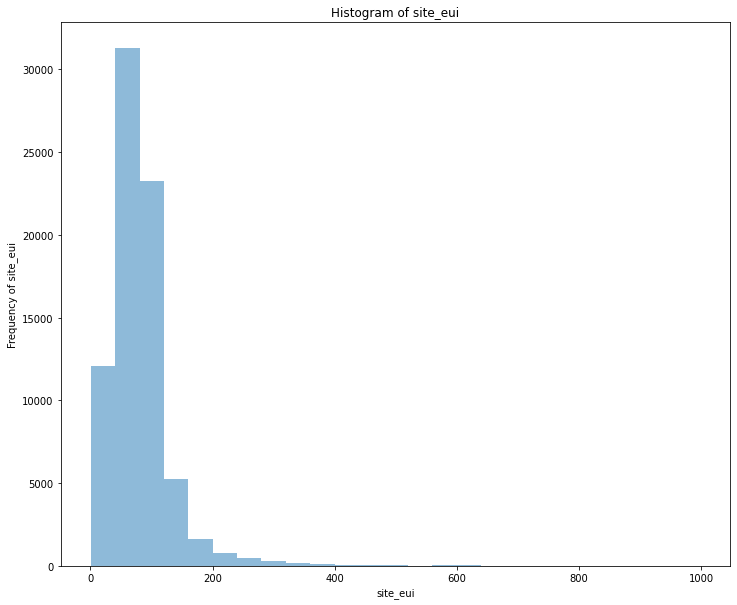

In [95]:
histogram_plt(df_climate)

### 10. If feature scaling is needed, do it, please

In [96]:
# doing feature scaling because the values are on various scales.

df = df_climate.drop(['building_class','id'], axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, df_climate.id,df_climate.building_class), 1)
df_norm.set_index('id','building_class')

/tmp/ipykernel_166/2505648343.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_norm = pd.concat((df_norm, df_climate.id,df_climate.building_class), 1)
/tmp/ipykernel_166/2505648343.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  df_norm.set_index('id','building_class')


,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui,building_class
id,,,,,,,,
0,0.009445,0.963772,0.154053,0.000000,0.380665,0.32489,0.248458,0
1,0.042769,0.970223,0.154053,0.000000,0.380665,0.00000,0.025580,0
2,0.043713,0.968238,0.154053,0.000000,0.380665,0.00000,0.023764,0
3,0.008518,0.982630,0.154053,0.000000,0.380665,0.00000,0.047559,0
4,0.010190,0.985112,0.154053,0.000000,0.380665,0.32489,0.002909,0
...,...,...,...,...,...,...,...,...
75752,0.003049,0.990074,0.418145,0.010998,0.324909,0.32489,0.132334,0
75753,0.006194,0.947891,0.418145,0.010998,0.324909,0.32489,0.038601,1
75754,0.004249,0.951365,0.987278,0.287510,0.103837,0.32489,0.047549,0


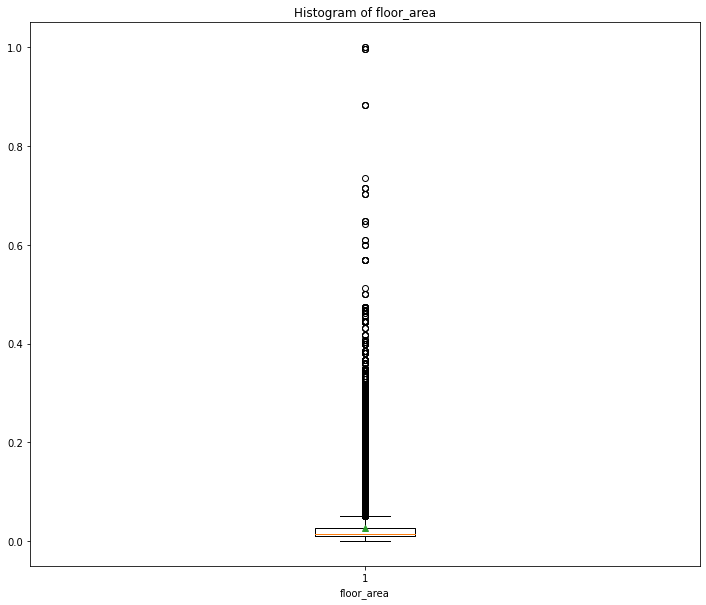

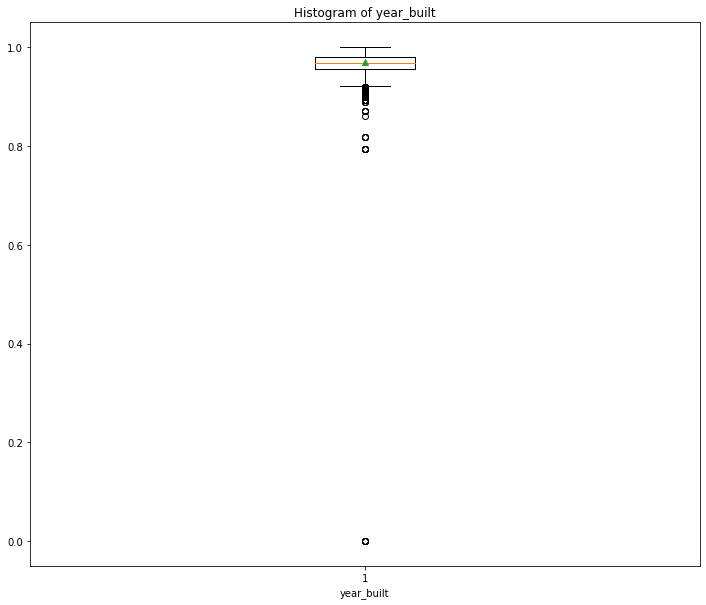

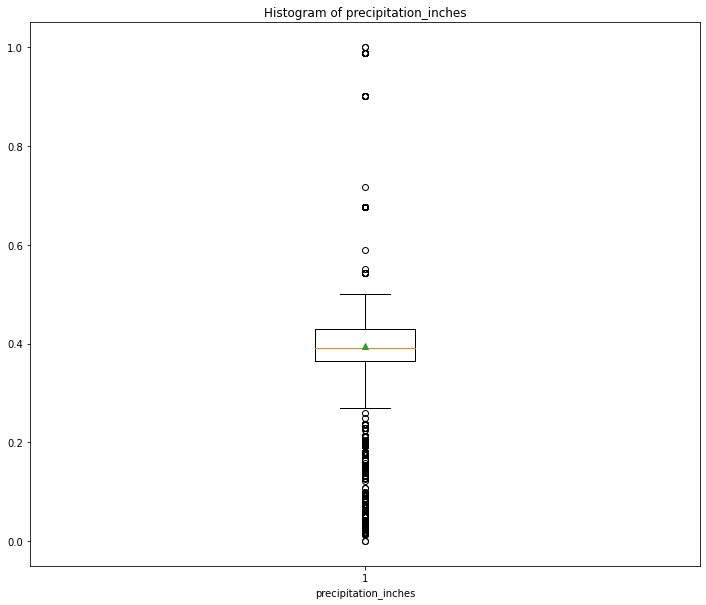

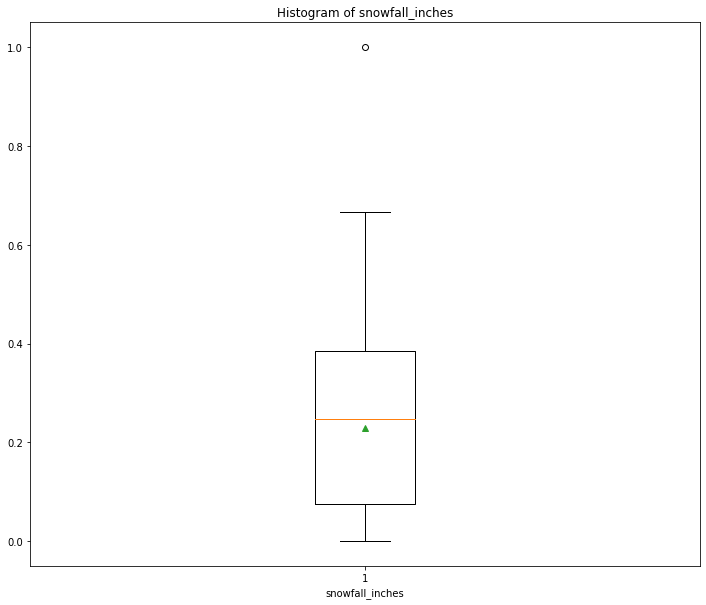

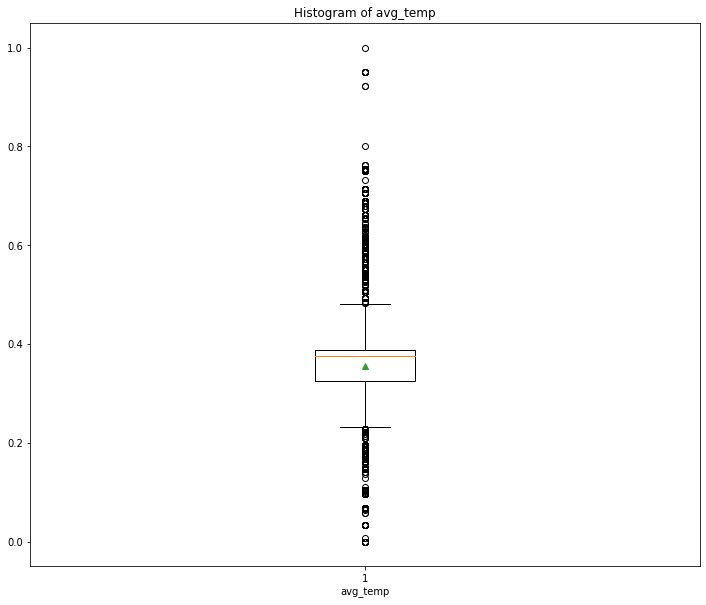

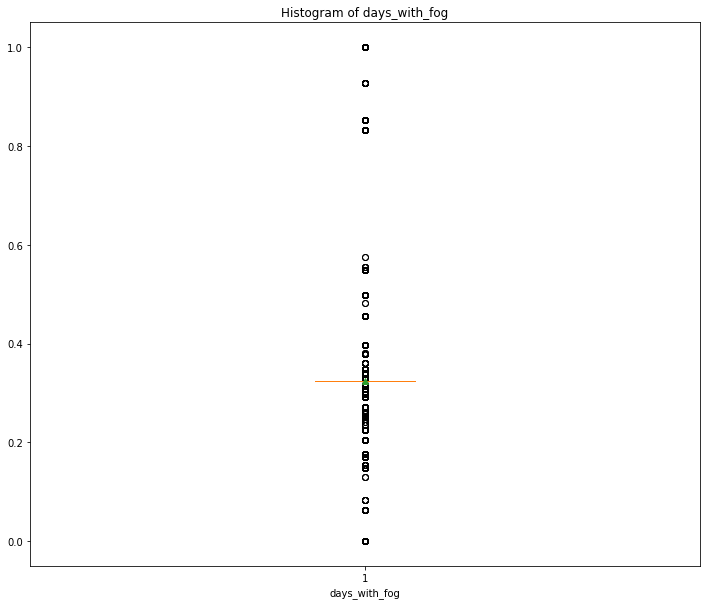

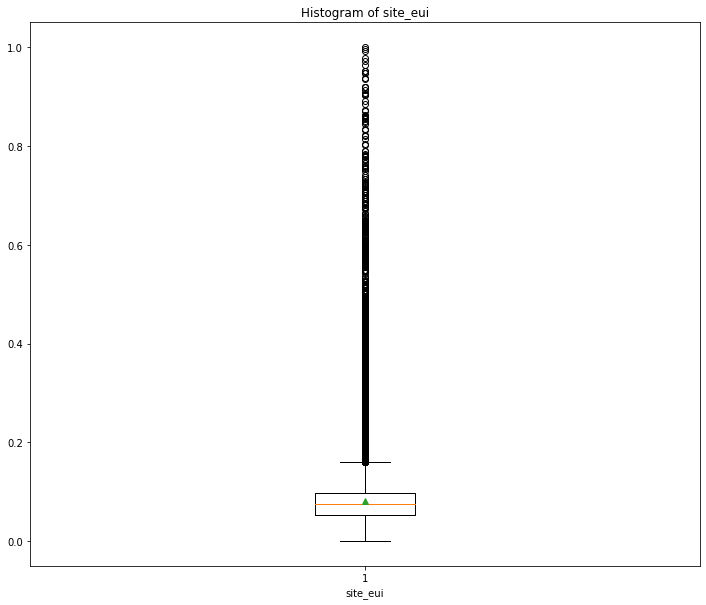

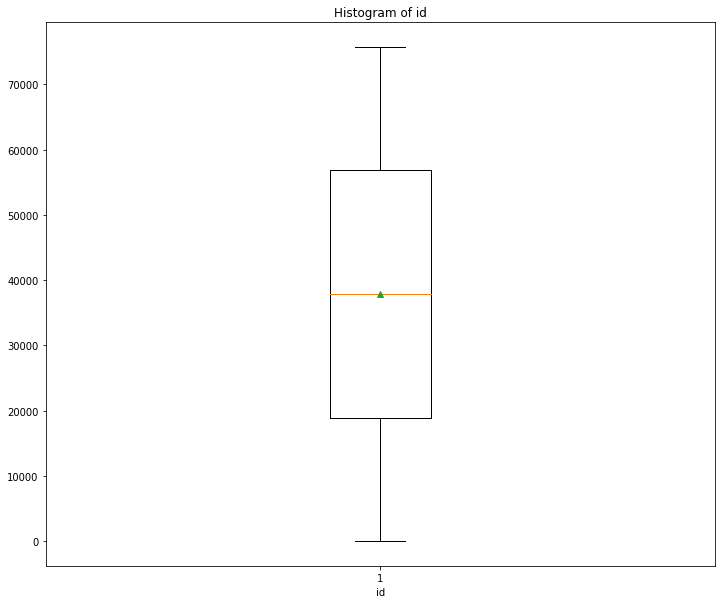

In [97]:
boxplot_plt(df_norm)

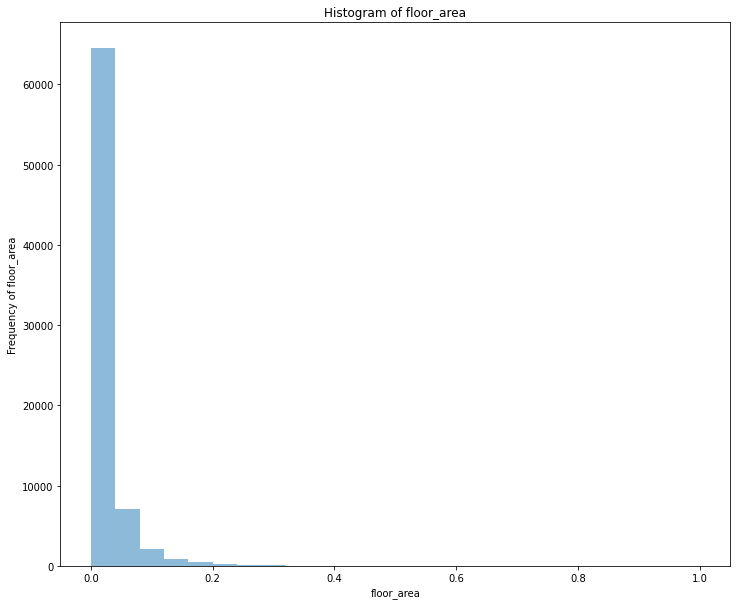

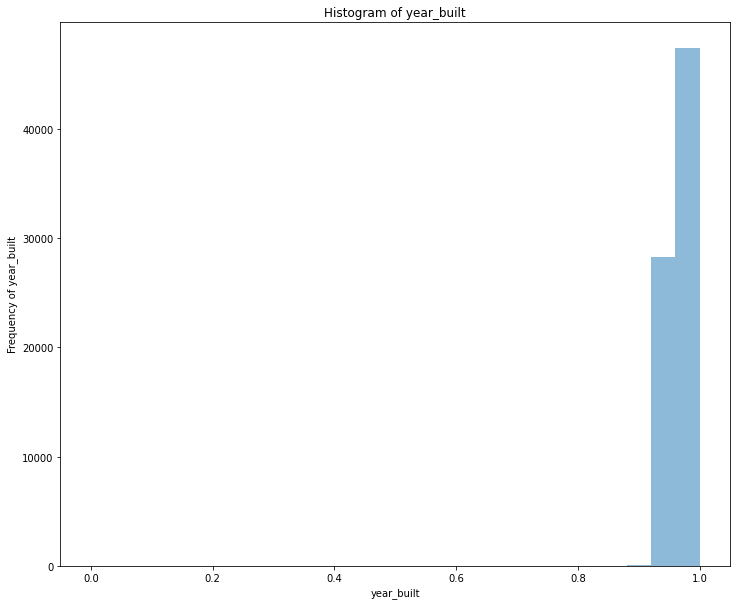

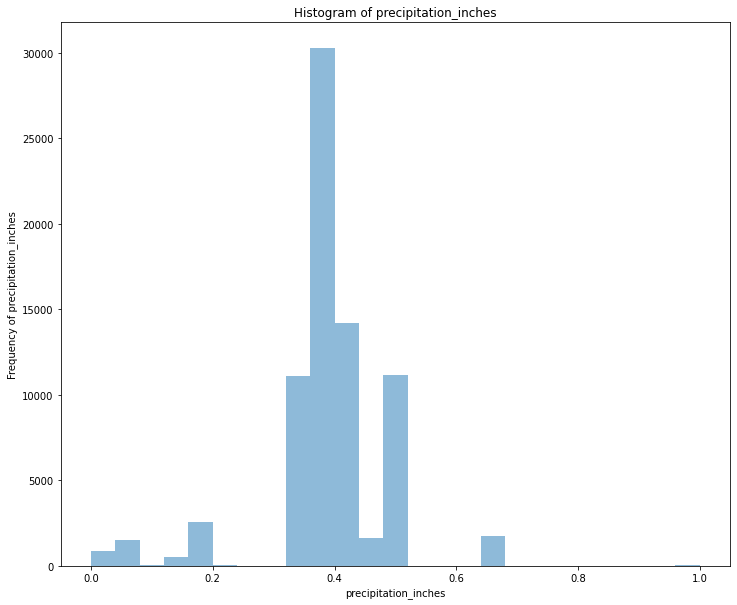

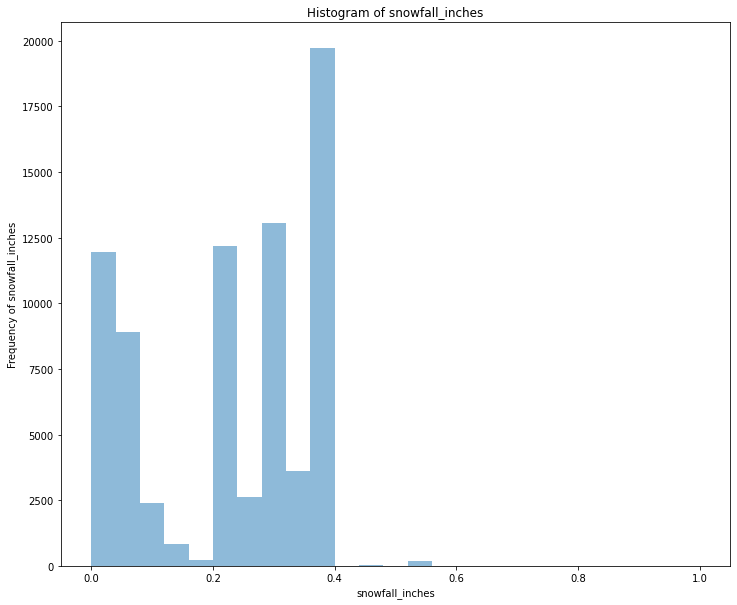

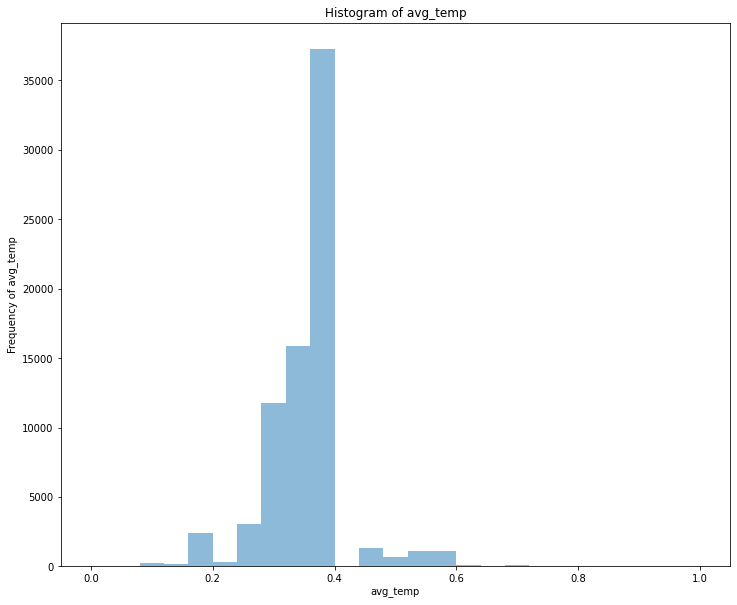

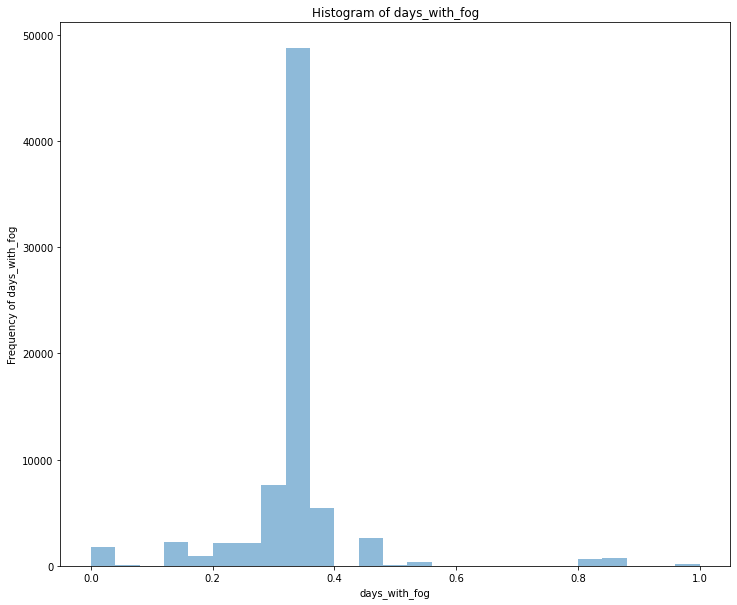

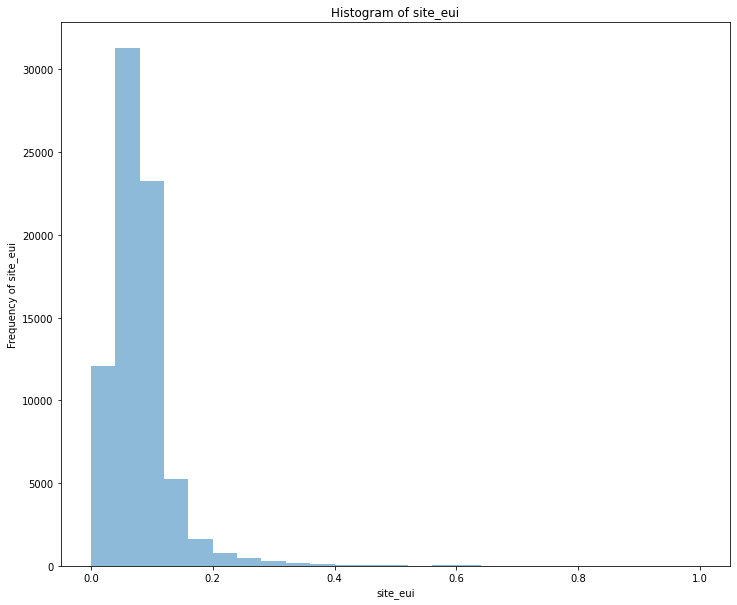

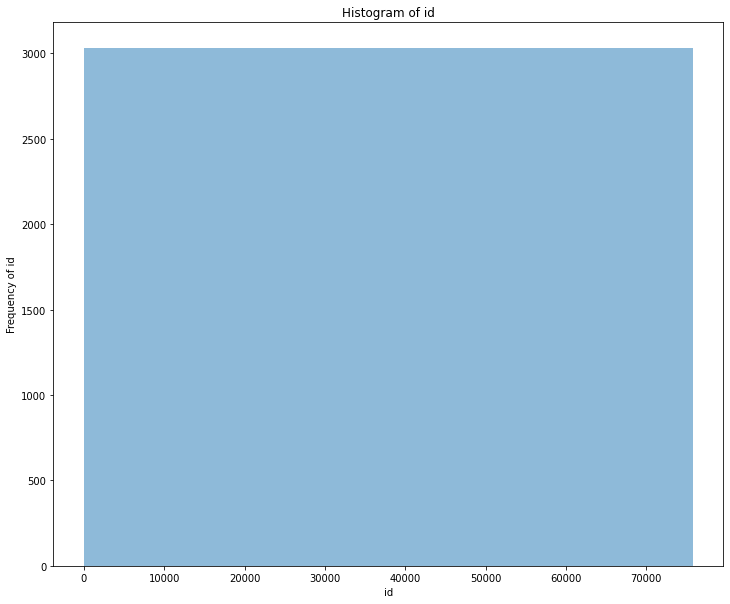

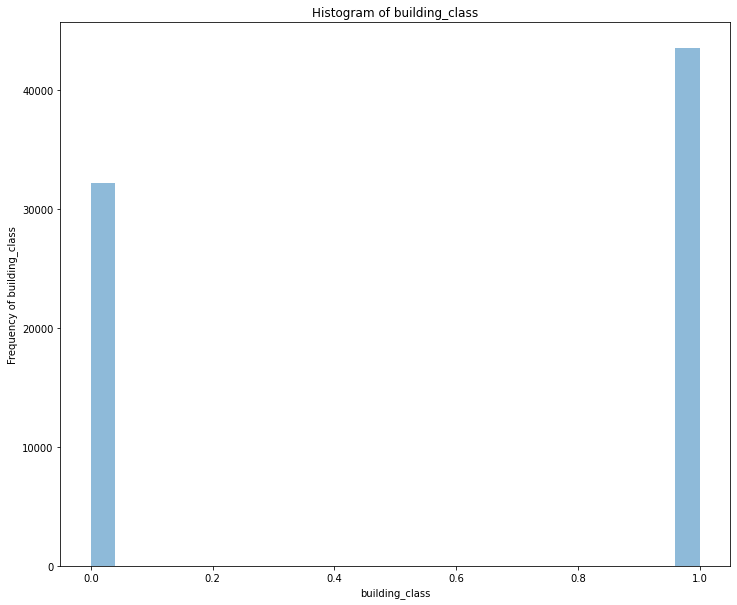

In [98]:
histogram_plt(df_norm)

In [103]:
def sns_plt(df):
    for column in df.columns:
        fig,ax= plt.subplots(figsize=(10,10))
        sns.distplot(df[column])

/home/lasta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lasta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lasta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

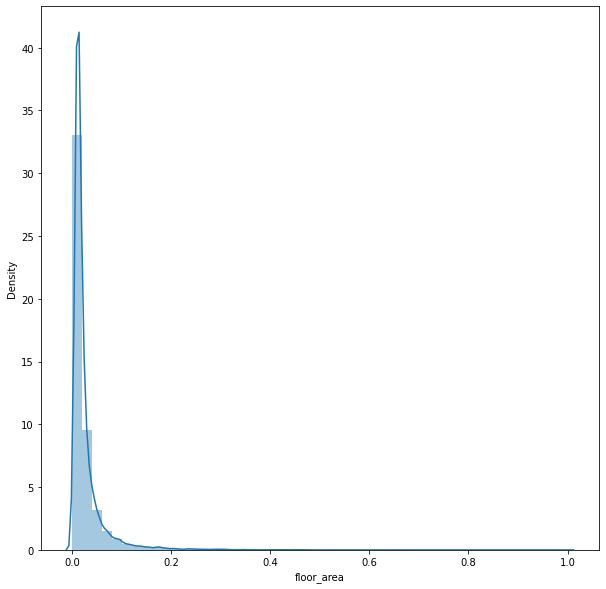

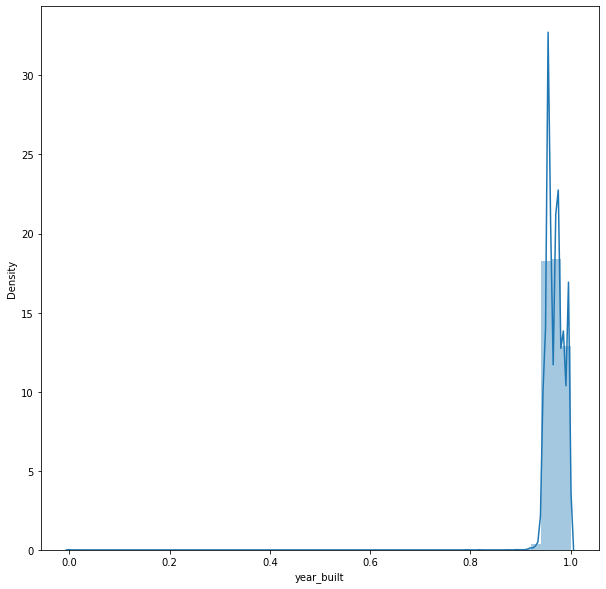

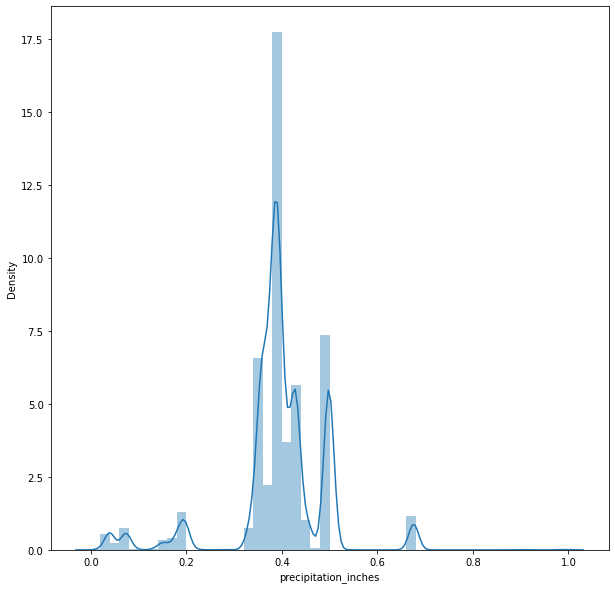

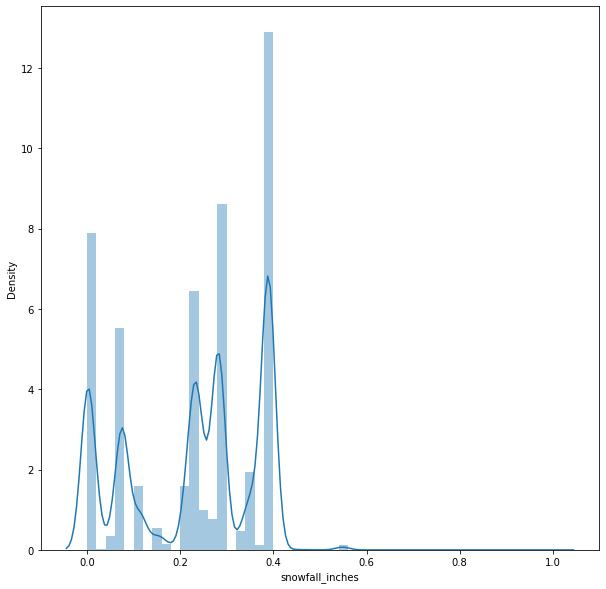

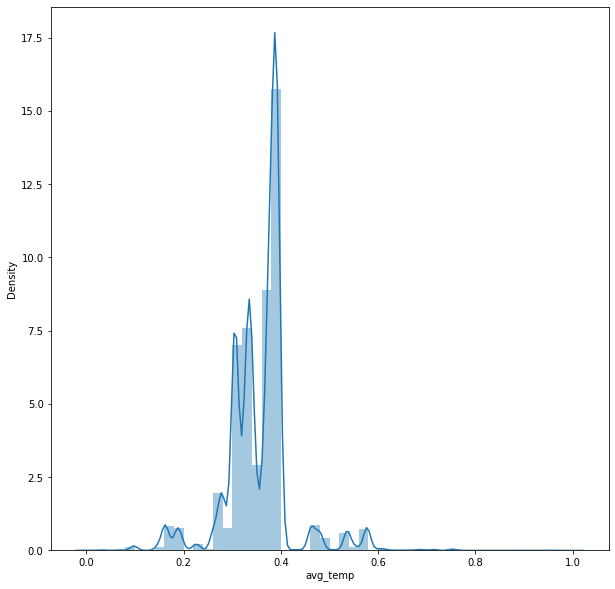

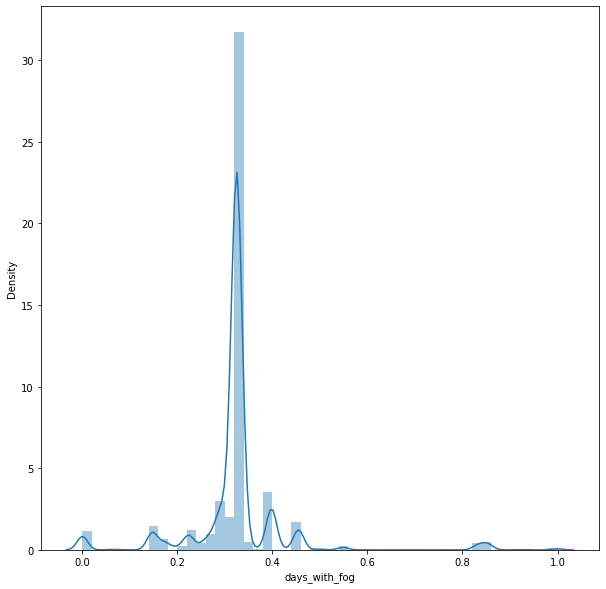

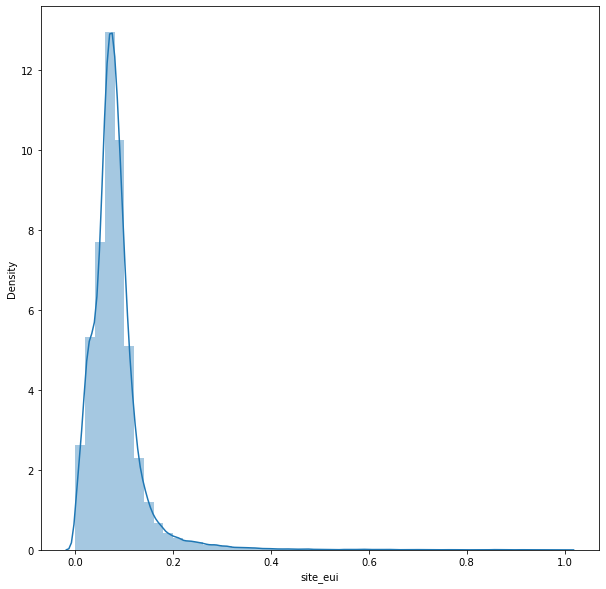

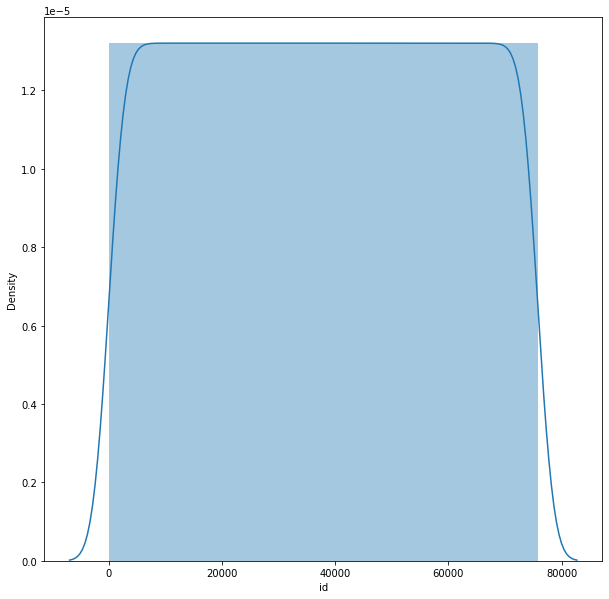

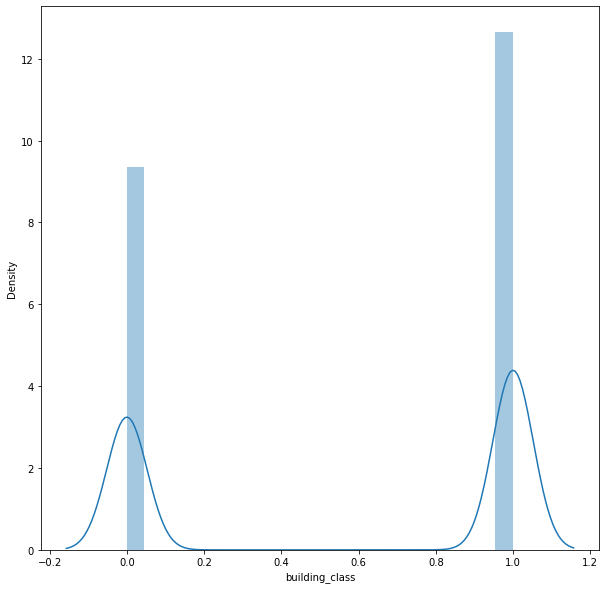

In [104]:
sns_plt(df_norm)